<a href="https://colab.research.google.com/github/KavyaJoshi19/movie_sentiment/blob/main/Movie_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install nltk tensorflow pandas matplotlib seaborn

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import tensorflow_datasets as tfds
(train_data, test_data), info = tfds.load(
    'imdb_reviews',
    split=['train', 'test'],
    with_info=True,
    as_supervised=True
)


In [ ]:
train_texts = []
train_labels = []
for text, label in train_data:
    train_texts.append(text.numpy().decode('utf-8'))
    train_labels.append(label.numpy())

test_texts = []
test_labels = []
for text, label in test_data:
    test_texts.append(text.numpy().decode('utf-8'))
    test_labels.append(label.numpy())

train_df = pd.DataFrame({'review': train_texts, 'sentiment': train_labels})
test_df = pd.DataFrame({'review': test_texts, 'sentiment': test_labels})

In [ ]:
print("Dataset shape:", train_df.shape)
print("\nSentiment distribution:")
print(train_df['sentiment'].value_counts())
print("\nSample reviews:")
print(train_df.head())

# Step 4: Text Preprocessing Function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into text
    processed_text = ' '.join(tokens)

    return processed_text

Dataset shape: (25000, 2)

Sentiment distribution:
sentiment
0    12500
1    12500
Name: count, dtype: int64

Sample reviews:
                                              review  sentiment
0  This was an absolutely terrible movie. Don't b...          0
1  I have been known to fall asleep during films,...          0
2  Mann photographs the Alberta Rocky Mountains i...          0
3  This is the kind of film for a snowy Sunday af...          1
4  As others have mentioned, all the women that g...          1


In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
print("Preprocessing text data...")
train_df['processed_review'] = train_df['review'].apply(preprocess_text)
test_df['processed_review'] = test_df['review'].apply(preprocess_text)

Preprocessing text data...


In [ ]:
print("Performing TF-IDF vectorization...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['processed_review'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['processed_review'])

y_train = train_df['sentiment']
y_test = test_df['sentiment']

Performing TF-IDF vectorization...


In [ ]:
print("\nTraining Logistic Regression model...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Evaluate Logistic Regression
lr_predictions = lr_model.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_predictions))


Training Logistic Regression model...
Logistic Regression Accuracy: 0.8769

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12500
           1       0.87      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [ ]:
print("\nTraining Naive Bayes model...")
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Evaluate Naive Bayes
nb_predictions = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, nb_predictions))


Training Naive Bayes model...
Naive Bayes Accuracy: 0.8386

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     12500
           1       0.85      0.82      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# For LSTM preprocessing and modeling
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [ ]:
print("\nPreparing data for LSTM model...")
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_df['processed_review'])

X_train_seq = tokenizer.texts_to_sequences(train_df['processed_review'])
X_test_seq = tokenizer.texts_to_sequences(test_df['processed_review'])

# Pad sequences to ensure uniform length
max_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')



Preparing data for LSTM model...


In [ ]:
max_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

In [ ]:
print("Building and training LSTM model...")
embedding_dim = 128

lstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=embedding_dim, input_length=max_length),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train LSTM model
epochs = 5
batch_size = 64

lstm_history = lstm_model.fit(
    X_train_pad, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=1
)

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_pad, y_test)
print(f"\nLSTM Test Accuracy: {lstm_accuracy:.4f}")

Building and training LSTM model...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 236s 736ms/step - accuracy: 0.5034 - loss: 0.6937 - val_accuracy: 0.5062 - val_loss: 1.0345
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 279s 793ms/step - accuracy: 0.5038 - loss: 0.7064 - val_accuracy: 0.4938 - val_loss: 0.6954
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 245s 738ms/step - accuracy: 0.5458 - loss: 0.6820 - val_accuracy: 0.5802 - val_loss: 0.6747
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 255s 714ms/step - accuracy: 0.5826 - loss: 0.6691 - val_accuracy: 0.5190 - val_loss: 0.6820
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 225s 718ms/step - accuracy: 0.5359 - loss: 0.6735 - val_accuracy: 0.5310 - val_loss: 0.6892
782/782 ━━━━━━━━━━━━━━━━━━━━ 105s 135ms/step - accuracy: 0.5302 - loss: 0.6936

LSTM Test Accuracy: 0.5307


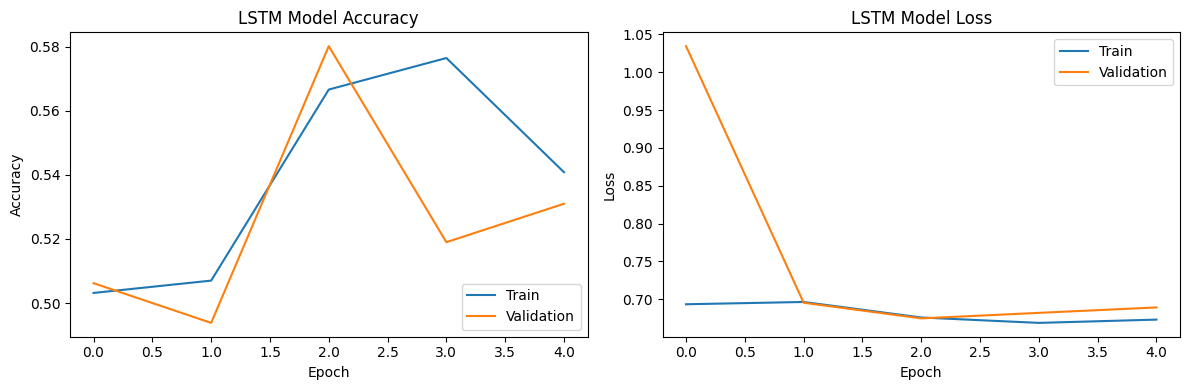

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

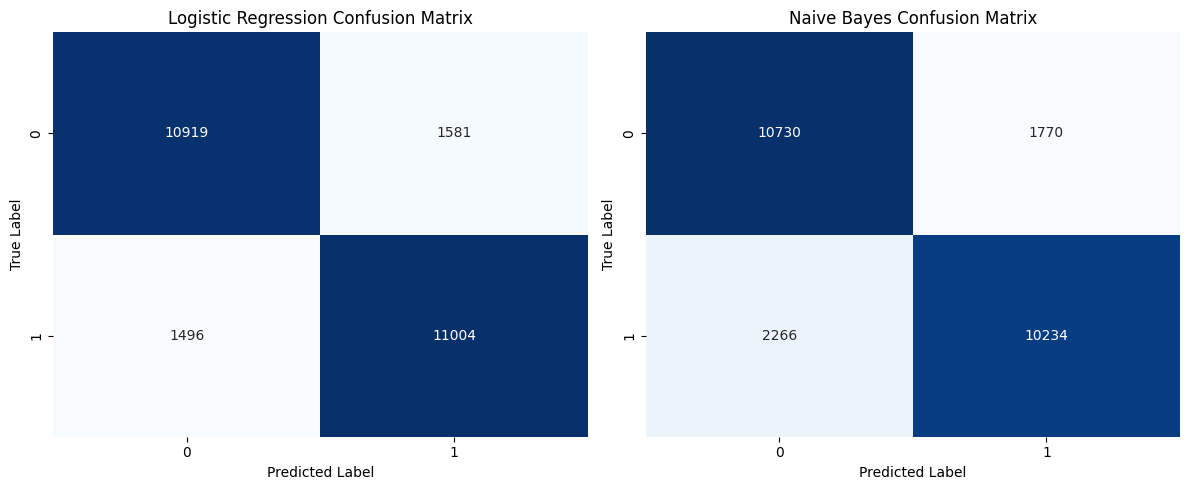

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.subplot(1, 2, 2)
cm = confusion_matrix(y_test, nb_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

In [ ]:
def predict_sentiment(review, model_type='lr'):
    # Preprocess the review
    processed_review = preprocess_text(review)

    if model_type == 'lr':
        # Vectorize using TF-IDF
        review_tfidf = tfidf_vectorizer.transform([processed_review])
        # Predict using Logistic Regression
        prediction = lr_model.predict(review_tfidf)[0]
        probability = lr_model.predict_proba(review_tfidf)[0][1]

    elif model_type == 'nb':
        # Vectorize using TF-IDF
        review_tfidf = tfidf_vectorizer.transform([processed_review])
        # Predict using Naive Bayes
        prediction = nb_model.predict(review_tfidf)[0]
        probability = nb_model.predict_proba(review_tfidf)[0][1]

    elif model_type == 'lstm':
        # Tokenize and pad the sequence
        review_seq = tokenizer.texts_to_sequences([processed_review])
        review_pad = pad_sequences(review_seq, maxlen=max_length, padding='post')
        # Predict using LSTM
        prediction_prob = lstm_model.predict(review_pad)[0][0]
        prediction = 1 if prediction_prob >= 0.5 else 0
        probability = prediction_prob if prediction == 1 else 1 - prediction_prob

    sentiment = "Positive" if prediction == 1 else "Negative"

    return {
        'sentiment': sentiment,
        'probability': float(probability),
        'model_used': model_type
    }

In [ ]:
sample_reviews = [
    "This movie was fantastic! The acting was superb and the plot kept me engaged throughout.",
    "Terrible waste of time. Bad acting and the story made no sense at all.",
    "The cinematography was beautiful, but the pacing was too slow for my taste."
]

print("\nTesting sentiment prediction on sample reviews:")
for review in sample_reviews:
    result_lr = predict_sentiment(review, 'lr')
    result_nb = predict_sentiment(review, 'nb')
    result_lstm = predict_sentiment(review, 'lstm')

    print(f"\nReview: {review}")
    print(f"Logistic Regression: {result_lr['sentiment']} (confidence: {result_lr['probability']:.2f})")
    print(f"Naive Bayes: {result_nb['sentiment']} (confidence: {result_nb['probability']:.2f})")
    print(f"LSTM: {result_lstm['sentiment']} (confidence: {result_lstm['probability']:.2f})")



Testing sentiment prediction on sample reviews:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step

Review: This movie was fantastic! The acting was superb and the plot kept me engaged throughout.
Logistic Regression: Positive (confidence: 0.89)
Naive Bayes: Positive (confidence: 0.77)
LSTM: Negative (confidence: 0.53)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

Review: Terrible waste of time. Bad acting and the story made no sense at all.
Logistic Regression: Negative (confidence: 0.00)
Naive Bayes: Negative (confidence: 0.05)
LSTM: Negative (confidence: 0.53)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step

Review: The cinematography was beautiful, but the pacing was too slow for my taste.
Logistic Regression: Negative (confidence: 0.45)
Naive Bayes: Positive (confidence: 0.53)
LSTM: Negative (confidence: 0.53)


In [ ]:
from IPython.display import display, HTML
from ipywidgets import widgets

def predict_interactive(b):
    review = text_input.value

    if not review:
        result_output.value = "Please enter a review to analyze."
        return

    model_choice = model_dropdown.value
    result = predict_sentiment(review, model_choice)


In [ ]:
def predict_interactive(b):
    review = text_input.value

    if not review:
        result_output.value = "Please enter a review to analyze."
        return

    model_choice = model_dropdown.value
    result = predict_sentiment(review, model_choice)

    # Determine confidence level text and color
    confidence = result['probability'] * 100
    if confidence >= 80:
        confidence_level = "High confidence"
        color = "green"
    elif confidence >= 60:
        confidence_level = "Moderate confidence"
        color = "orange"
    else:
        confidence_level = "Low confidence"
        color = "red"

    result_output.value = f"""
    <div style="padding: 10px; border-radius: 5px; border: 1px solid #ddd;">
        <h3 style="margin-top: 0;">Sentiment Analysis Result</h3>
        <p><b>Review:</b> {review}</p>
        <p><b>Sentiment:</b> <span style="color: {'green' if result['sentiment'] == 'Positive' else 'red'};
                                   font-weight: bold;">{result['sentiment']}</span></p>
        <p><b>Confidence:</b> <span style="color: {color};">{confidence:.1f}% ({confidence_level})</span></p>
        <p><b>Model used:</b> {model_dropdown.value}</p>
    </div>
    """

In [ ]:
title = widgets.HTML(value="<h2>Movie Review Sentiment Analyzer</h2>")
text_input = widgets.Textarea(
    value='',
    placeholder='Enter a movie review here...',
    description='Review:',
    disabled=False,
    layout=widgets.Layout(width='100%', height='100px')
)
model_dropdown = widgets.Dropdown(
    options=[('Logistic Regression', 'lr'), ('Naive Bayes', 'nb'), ('LSTM Neural Network', 'lstm')],
    value='lr',
    description='Model:',
    disabled=False,
)
predict_button = widgets.Button(
    description='Analyze Sentiment',
    disabled=False,
    button_style='primary',
    tooltip='Click to analyze sentiment',
    icon='check'
)
result_output = widgets.HTML(value="")


In [ ]:
predict_button.on_click(predict_interactive)


In [ ]:
#interface
print("\nInteractive Sentiment Analysis Interface:")
display(title)
display(text_input)
display(model_dropdown)
display(predict_button)
display(result_output)

print("\nSummary of Model Performance:")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"LSTM Neural Network Accuracy: {lstm_accuracy:.4f}")


Interactive Sentiment Analysis Interface:


HTML(value='<h2>Movie Review Sentiment Analyzer</h2>')

Textarea(value='', description='Review:', layout=Layout(height='100px', width='100%'), placeholder='Enter a mo…

Dropdown(description='Model:', options=(('Logistic Regression', 'lr'), ('Naive Bayes', 'nb'), ('LSTM Neural Ne…

Button(button_style='primary', description='Analyze Sentiment', icon='check', style=ButtonStyle(), tooltip='Cl…

HTML(value='')


Summary of Model Performance:
Logistic Regression Accuracy: 0.8769
Naive Bayes Accuracy: 0.8386
LSTM Neural Network Accuracy: 0.5307


In [ ]:
from IPython.display import display
from ipywidgets import widgets

# Define the test_review function
def test_review(review_text):
    # Check if review is empty
    if not review_text.strip():
        return "Please enter a review to analyze."

    # Ensure preprocessing function exists
    if 'preprocess_text' not in globals():
        return "Error: preprocess_text function not defined"

    # Ensure models are trained
    if 'lr_model' not in globals() or 'tfidf_vectorizer' not in globals():
        return "Error: Models not trained yet"

    # Try logistic regression prediction
    try:
        processed_review = preprocess_text(review_text)
        review_tfidf = tfidf_vectorizer.transform([processed_review])

        # Predict using Logistic Regression
        lr_prediction = lr_model.predict(review_tfidf)[0]
        lr_probability = lr_model.predict_proba(review_tfidf)[0][1]
        lr_sentiment = "Positive" if lr_prediction == 1 else "Negative"

        # Predict using Naive Bayes if available
        nb_results = ""
        if 'nb_model' in globals():
            nb_prediction = nb_model.predict(review_tfidf)[0]
            nb_probability = nb_model.predict_proba(review_tfidf)[0][1]
            nb_sentiment = "Positive" if nb_prediction == 1 else "Negative"
            nb_results = f"Naive Bayes: {nb_sentiment} (confidence: {nb_probability:.2f})\n"

        # Try LSTM if available
        lstm_results = ""
        if 'lstm_model' in globals() and 'tokenizer' in globals():
            review_seq = tokenizer.texts_to_sequences([processed_review])
            max_length = 200  # Make sure this matches your training
            review_pad = pad_sequences(review_seq, maxlen=max_length, padding='post')

            lstm_prob = lstm_model.predict(review_pad, verbose=0)[0][0]
            lstm_sent = "Positive" if lstm_prob >= 0.5 else "Negative"
            lstm_confidence = lstm_prob if lstm_sent == "Positive" else 1-lstm_prob

            lstm_results = f"LSTM: {lstm_sent} (confidence: {lstm_confidence:.2f})"

        return f"Review: \"{review_text}\"\n\nLogistic Regression: {lr_sentiment} (confidence: {lr_probability:.2f})\n{nb_results}{lstm_results}"

    except Exception as e:
        return f"Error during prediction: {e}"

# Create a simple UI
text_input = widgets.Textarea(
    value='',
    placeholder='Enter a movie review here...',
    description='Review:',
    disabled=False,
    layout=widgets.Layout(width='100%', height='100px')
)

analyze_button = widgets.Button(
    description='Analyze Sentiment',
    button_style='primary',
    tooltip='Click to analyze sentiment'
)

output = widgets.Output()

def on_button_click(b):
    with output:
        output.clear_output()
        result = test_review(text_input.value)
        print(result)

analyze_button.on_click(on_button_click)

print("Enter a movie review and click the button to analyze its sentiment:")
display(text_input)
display(analyze_button)
display(output)


Enter a movie review and click the button to analyze its sentiment:


Textarea(value='', description='Review:', layout=Layout(height='100px', width='100%'), placeholder='Enter a mo…

Button(button_style='primary', description='Analyze Sentiment', style=ButtonStyle(), tooltip='Click to analyze…

Output()

In [ ]:
import pickle
import os

In [ ]:
os.makedirs('sentiment_models', exist_ok=True)

In [ ]:
with open('sentiment_models/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

with open('sentiment_models/lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

with open('sentiment_models/nb_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)

In [ ]:
with open('sentiment_models/tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)


In [ ]:
lstm_model.save('sentiment_models/lstm_model.h5')

print("\nAll models saved to 'sentiment_models/' directory")
print("Project completed!")


All models saved to 'sentiment_models/' directory
Project completed!
